In [339]:
# Import all libraries and packages

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA


In [340]:
# Import all libraries and packages

import seaborn as sb




In [341]:
# Load data

churn=pd.read_csv('churn_raw_data.csv')

In [342]:
# Examinning the Data types

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [343]:
# Looking for duplicates

print (churn.duplicated().value_counts())


False    10000
Name: count, dtype: int64


In [344]:
# Looking to see if the data in the dataset has any missing values

churn.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [345]:
# Base on the data above, it can be shown that we have missing values in:

'Children', 'Age', 'Income','Tachie', 'InternetService', 'Phone', 'TechSupport', 'Tenure', 'Bandwidth_GB_Year'

('Children',
 'Age',
 'Income',
 'Tachie',
 'InternetService',
 'Phone',
 'TechSupport',
 'Tenure',
 'Bandwidth_GB_Year')

array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Bandwidth_GB_Year'}>, <Axes: >]],
      dtype=object)

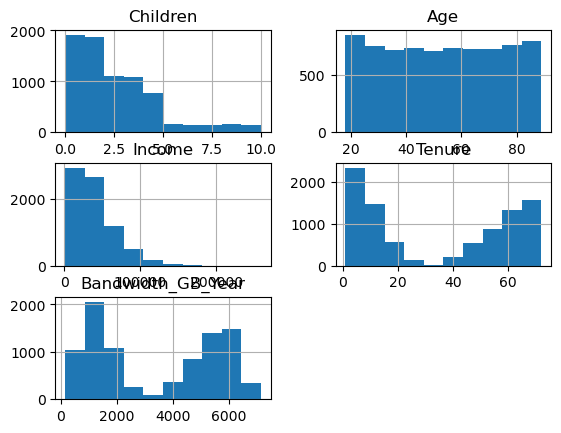

In [346]:
# Examining the distribution with a Histogram

churn[['Children', 'Age', 'Income', 'Tenure', 'Bandwidth_GB_Year']].hist()

In [347]:
# Performing imputation to replace missing values with Median and Mode

churn['Children'].fillna (churn['Children'].median(), inplace=True)
churn['Age'].fillna(churn['Age'].mean(), inplace=True)
churn['Income'].fillna(churn['Income'].median(), inplace=True)
churn['Tenure'].fillna(churn['Tenure'].median(), inplace=True)
churn['Bandwidth_GB_Year'].fillna(churn['Bandwidth_GB_Year'].median(), inplace=True)

In [348]:
# Tachie and Phone are catergorical variables, thus, i used the mode to replace missing values

churn['Techie']=churn['Techie'].fillna(churn['Techie'].mode()[0])
churn['InternetService']=churn['InternetService'].fillna(churn['InternetService'].mode()[0])
churn['Phone']=churn['Phone'].fillna(churn['Phone'].mode()[0])
churn['TechSupport']=churn['TechSupport'].fillna(churn['TechSupport'].mode()[0])

In [349]:
# Get Quantitative/Numenrical variables

churn_num_data=churn.select_dtypes(include=[np.number])
churn_num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Zip                   10000 non-null  int64  
 3   Lat                   10000 non-null  float64
 4   Lng                   10000 non-null  float64
 5   Population            10000 non-null  int64  
 6   Children              10000 non-null  float64
 7   Age                   10000 non-null  float64
 8   Income                10000 non-null  float64
 9   Outage_sec_perweek    10000 non-null  float64
 10  Email                 10000 non-null  int64  
 11  Contacts              10000 non-null  int64  
 12  Yearly_equip_failure  10000 non-null  int64  
 13  Tenure                10000 non-null  float64
 14  MonthlyCharge         10000 non-null  float64
 15  Bandwidth_GB_Year   

<Axes: >

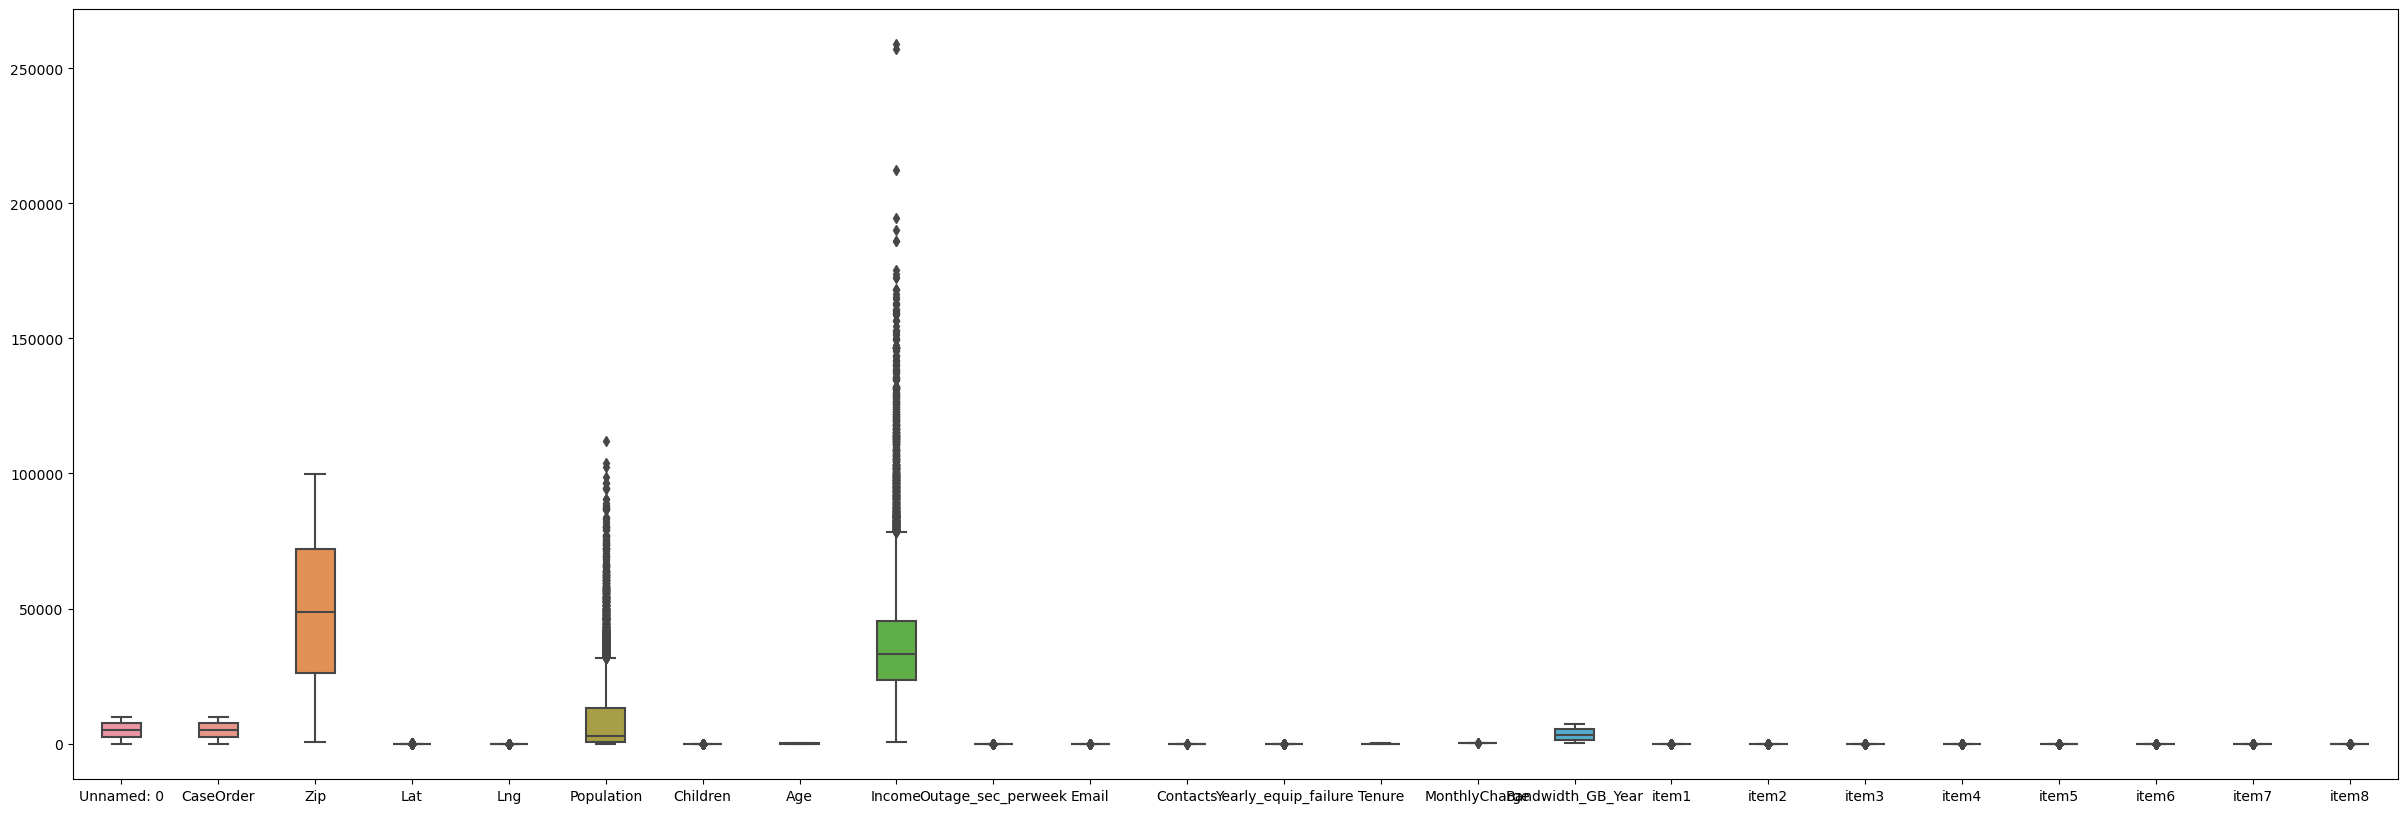

In [350]:
# Using Boxplot to establish which varaibles has outliers

plt.subplots(figsize=(30, 10))
sns.boxplot(data=churn_num_data, width=0.4)


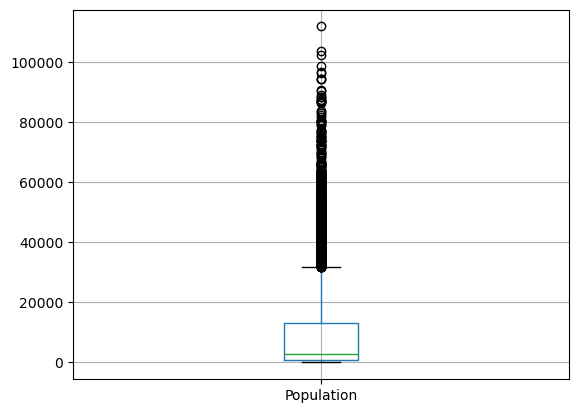

In [351]:
# Create a Boxplot to look for outliers in population

bp=churn.boxplot(column=['Population'])

In [352]:
# Get the exact number of outliers in Population

Population_z=(churn['Population']-churn['Population'].mean())/churn['Population'].std()
outlier=churn.loc[(Population_z>3)|(Population_z<-3)]
print (outlier)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
57            58         58     C101444  5ed9b266-29a0-489e-88e0-59f9a0b39e49   
90            91         91     G491883  0319a159-cefc-4d57-804b-c5a16de84ca6   
100          101        101     O967373  57582d0e-06d5-453f-934f-cd35554c860c   
157          158        158     K265986  9f0486c9-e0fc-4762-8f35-e676fbefb689   
203          204        204      K33780  10a165f2-6ce5-47ff-bec5-925b3d5eebf0   
...          ...        ...         ...                                   ...   
9647        9648       9648     W662241  64d7344d-cec1-4558-83f3-aaad018c8433   
9728        9729       9729     C304454  658084be-e583-42dd-b71b-df74dbb7d685   
9905        9906       9906     T636629  bbe2f044-f023-4826-b154-797569131618   
9987        9988       9988     C454652  c4cb88a8-dd44-46a4-84e7-891edf25cbaf   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   

              City State   

<Axes: >

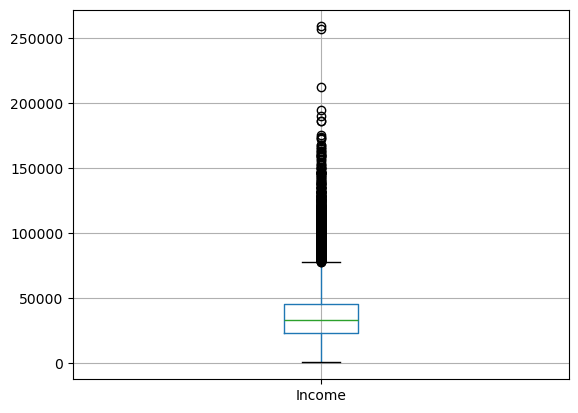

In [353]:
# Look for Outliers in Income
churn.boxplot(column=['Income'])

In [354]:
# Get the exact number of outliers in Population

Income_z=(churn['Income']-churn['Income'].mean())/churn['Income'].std()
outlier=churn.loc[(Income_z>3)|(Income_z<-3)]
print (outlier)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
13            14         14      X44200  780992d3-d758-4152-aceb-5d59edda3d15   
46            47         47     B609739  bb4a7c2d-6524-41d6-b2ed-f7511509ff5b   
92            93         93     K581313  87ec7c0f-2780-4909-9bf3-5369082eab90   
130          131        131     X645702  cfc79a87-f608-485d-86c9-cfce7db37a29   
186          187        187     F501848  b47490b5-a967-4f46-a76a-600552c4d141   
...          ...        ...         ...                                   ...   
9726        9727       9727     B689525  be842d38-7058-4eb1-bddc-2bf1c73ffbb0   
9758        9759       9759     L933769  02d26ed1-c450-428f-8dd3-71403cd56cd7   
9849        9850       9850     C406267  5fae818b-cdcb-452e-bb5a-c9dc04ed9383   
9876        9877       9877     T156561  34f05b13-dc84-4732-a9ac-2e2c68a2d625   
9891        9892       9892     J966666  203d77c6-4cb3-45ba-9ea9-c7c61f98e51f   

                City State 

In [355]:
# Performing imputation

churn['Children'].fillna (churn['Children'].median(), inplace=True)
churn['Age'].fillna(churn['Age'].mean(), inplace=True)
churn['Income'].fillna(churn['Income'].median(), inplace=True)
churn['Tenure'].fillna(churn['Tenure'].median(), inplace=True)
churn['Bandwidth_GB_Year'].fillna(churn['Bandwidth_GB_Year'].median(), inplace=True)

In [356]:
# Tachie and Phone are catergorical variables, thus, i used the mode to replace missing values

churn['Techie']=churn['Techie'].fillna(churn['Techie'].mode()[0])
churn['Phone']=churn['Phone'].fillna(churn['Phone'].mode()[0])
churn['InternetService']=churn['InternetService'].fillna(churn['InternetService'].mode()[0])
churn['TechSupport']=churn['TechSupport'].fillna(churn['TechSupport'].mode()[0])

In [357]:
# Get the median Population
med=churn['Population'].quantile(0.5)
print(med)

2910.5


In [358]:
# Get upper value of Population

q1=churn['Population'].quantile(0.25)
q3=churn['Population'].quantile(0.75)
iqr=q3-q1
upper=q3+(iqr*1.5)
print(upper)

31813.0


In [359]:
# Replace the in Population with Median

churn['Population']=np.where (churn['Population']>131813, 2910.5, churn['Population'])

In [360]:
# Get the median of Income
med=churn['Income'].quantile(0.25)
print (med)

23660.79


In [361]:
# Get upper value of Income

q1=churn['Income'].quantile(0.25)
q3=churn['Income'].quantile(0.75)
iqr=q3-q1
upper=q3+(iqr*1.5)
print (upper)

78269.29624999998


In [362]:
# Replace the in Income with Median

churn['Income']=np.where (churn['Income']>78269.29, 23660.79, churn['Income'])

In [379]:
# Define Variables for PCA

churn_pca=churn[['Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
                 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3', 'item4', 'item5',
                 'item6', 'item7', 'item8']]

In [380]:
# Normalize the dataframe and make new dataframe

churn_pca_normalized=(churn_pca-churn_pca.mean())/churn_pca.std()

In [383]:
# Finding out the number of companents that can be extracted from the analysis

pca=PCA(n_components=churn_pca.shape[1])

In [384]:
# Fitting the pca into our normalised data
pca.fit(churn_pca_normalized)

PCA(n_components=22)

In [385]:
#Create a new data that converts the dataset of varaibles

churn_pca2=pd.DataFrame(pca.transform(churn_pca_normalized),
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17',
         'PC18', 'PC19', 'PC20', 'PC21', 'PC22'])

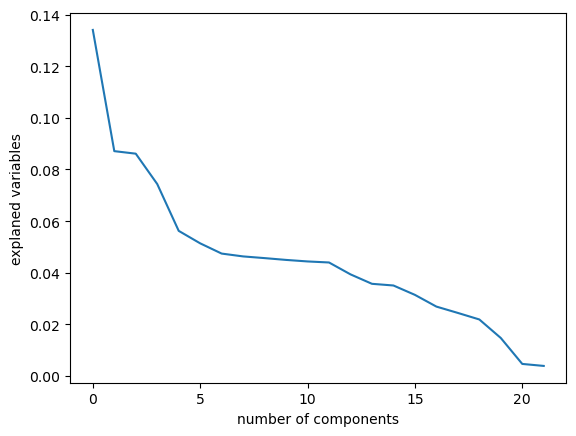

In [386]:
# plot the sree plot

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explaned variables')
plt.show()

In [388]:
# Extracting eigenvalue from python

cov_matrix=np.dot(churn_pca_normalized.T, churn_pca_normalized)/churn_pca.shape[0]
eigenvalue=[np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

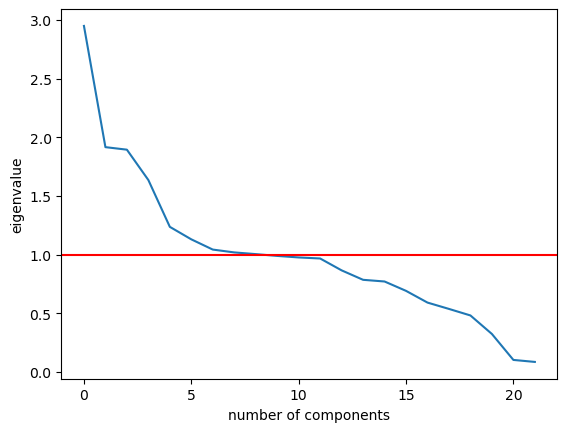

In [389]:
# Now plot the sree plot using 2 or more components

plt.plot(eigenvalue)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color='red')
plt.show()

In [390]:
# Load the output of components

loadings=pd.DataFrame(pca.components_.T, 
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17',
         'PC18', 'PC19', 'PC20', 'PC21', 'PC22'],
index=churn_pca.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
Zip,-0.018962,0.597279,0.367954,0.046115,0.025266,0.007628,0.010617,0.001794,0.014048,0.011546,...,-0.018741,-0.091634,-0.075949,-0.013232,-0.011960,-0.002959,-0.003943,0.011882,0.037733,-0.698076
Lat,-0.001119,0.036260,-0.003609,-0.003320,-0.699594,-0.070941,-0.080670,-0.067324,0.012896,0.033991,...,0.042704,0.513697,0.456228,0.038695,0.027473,-0.005825,0.013798,-0.008081,0.007605,-0.117764
Lng,0.016914,-0.600559,-0.367593,-0.043804,0.060545,0.002600,0.002150,0.015708,-0.014212,-0.014407,...,0.005520,-0.020150,-0.019319,0.002650,0.006797,0.011384,-0.006947,-0.008291,0.039654,-0.703326
Population,-0.002885,0.051700,0.039307,0.023079,0.669452,0.084240,0.080227,0.074104,0.038584,-0.121285,...,0.070854,0.578532,0.403224,0.050596,0.000571,-0.000446,0.000434,-0.006206,0.001058,-0.031012
Children,0.000867,-0.028203,-0.019246,0.006605,-0.057607,0.002471,0.609087,0.002340,0.250689,0.259918,...,-0.002357,0.005061,0.035264,-0.037310,-0.018800,0.012099,0.019178,-0.008393,-0.018328,0.000510
Age,0.005048,0.005971,-0.011892,-0.017452,0.024177,-0.041035,-0.456717,0.454749,-0.114916,0.507528,...,0.111804,0.048637,-0.039593,0.010045,-0.000882,-0.012316,0.008646,0.016095,0.021570,0.002126
Income,0.009453,-0.006379,0.008195,0.017005,-0.119175,-0.029335,0.270288,0.417062,0.623524,-0.142274,...,0.088858,-0.081652,-0.000453,-0.012356,0.025330,-0.012031,-0.001825,0.020178,-0.000852,0.005244
Outage_sec_perweek,-0.013242,-0.004080,0.018685,-0.047616,-0.096456,0.697671,0.027753,-0.010032,-0.048374,-0.014957,...,0.689987,0.020106,-0.125743,0.007713,-0.012329,-0.016591,0.010193,-0.003949,0.000891,-0.000541
Email,0.008738,0.000828,-0.023541,-0.004730,0.141522,0.090011,-0.134161,-0.383145,0.442991,0.686667,...,-0.032800,-0.014424,0.077621,-0.013725,-0.014536,0.006386,-0.016626,0.001200,0.005557,-0.002745
Contacts,-0.008428,-0.009651,-0.001453,-0.011295,0.022503,-0.003530,-0.450091,0.343693,0.454335,-0.239985,...,0.005464,-0.026053,0.026291,-0.037047,-0.004504,-0.026049,0.020900,-0.000827,-0.002779,0.002200
